You MUST build on top of what we have coded in the class (to prevent anyone from just copying from the internet).

1.  Try a real corpus (instead of banana apple, try something real... on the internet....) - not so big!  Just so you have a good taste of real stuff....like 50 documents, each having 50 words...(really up to you)

2. Try a window size of 2

3. Implement CBOW (instead of skipgrams)

4. Compare normal version of skipgrams vs. negative sampling version of skipgrams in terms of time (using real corpus)

Point criteria:
0: not done/copy directly from your friend (inspired is ok)
1: ok
2: with comments, and a nice explanation along the notebook (like how Chaky do his tutorial...)

In [50]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [51]:
np.__version__, torch.__version__

('1.23.2', '1.12.1+cpu')

In [52]:
import matplotlib
matplotlib.__version__

'3.5.3'

## 1.Load Data


In [53]:
# to try a real corpus this time .not so big: for instance 50 docuements , each having 50 words 
# we will use the corpus from the introduction to NLP course

import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\pyaes\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [54]:
# wait like prof said, we need to tokenize the corpus first so install and import spacy 
import spacy
spacy.__version__

'3.4.4'

In [55]:
#loading the english model that we have downloaded locally 
nlp = spacy.load("en_core_web_sm")
#if you want even stronger model, use en_core_web_med, en_core_web_lg, en_core_web_transformers

In [56]:
# a real corpyus of 50 documents, each having 50 words
# something like this: 
text = gutenberg.raw('austen-emma.txt')
text = text[:50*50]
text

"[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice of 

In [57]:
# now we can tokenize the corpus

for token in nlp(text):
    print(token)

[
Emma
by
Jane
Austen
1816
]



VOLUME
I



CHAPTER
I




Emma
Woodhouse
,
handsome
,
clever
,
and
rich
,
with
a
comfortable
home


and
happy
disposition
,
seemed
to
unite
some
of
the
best
blessings


of
existence
;
and
had
lived
nearly
twenty
-
one
years
in
the
world


with
very
little
to
distress
or
vex
her
.



She
was
the
youngest
of
the
two
daughters
of
a
most
affectionate
,


indulgent
father
;
and
had
,
in
consequence
of
her
sister
's
marriage
,


been
mistress
of
his
house
from
a
very
early
period
.
 
Her
mother


had
died
too
long
ago
for
her
to
have
more
than
an
indistinct


remembrance
of
her
caresses
;
and
her
place
had
been
supplied


by
an
excellent
woman
as
governess
,
who
had
fallen
little
short


of
a
mother
in
affection
.



Sixteen
years
had
Miss
Taylor
been
in
Mr.
Woodhouse
's
family
,


less
as
a
governess
than
a
friend
,
very
fond
of
both
daughters
,


but
particularly
of
Emma
.
 
Between
_
them
_
it
was
more
the
intimacy


of
sisters
.
 
Even
before
Miss
Taylor
h

In [58]:
# himmm , what if we want to get the pos tag of each word? we can do it like this
#for token in nlp(text):
    #print(token.text, token.pos_, token.dep_)

In [59]:
# numericalize the corpus
# we are gonna create a function that takes a corpus as input and returns a dictionary that maps each word to a unique index
def numericalize(corpus):
    vocabs = corpus.split()
    word2idx = {word: i for i, word in enumerate(set(vocabs))}
    idx2word = {i: word for i, word in enumerate(set(vocabs))}
    return word2idx, idx2word

word2idx, idx2word = numericalize(text)
word2idx


{'match;': 0,
 'means': 1,
 'by': 2,
 'to': 3,
 'came--a': 4,
 'this': 5,
 'allowed': 6,
 'gone,': 7,
 'as': 8,
 'for': 9,
 'power': 10,
 'home': 11,
 'cheer': 12,
 'on': 13,
 'indulgent': 14,
 'daughters,': 15,
 'prospect': 16,
 'Emma': 17,
 'father;': 18,
 'unite': 19,
 'hardly': 20,
 'any': 21,
 'chiefly': 22,
 'father': 23,
 'unperceived,': 24,
 'and': 25,
 'event': 26,
 'disadvantages': 27,
 'fallen': 28,
 'indeed,': 29,
 'consequence': 30,
 'The': 31,
 'herself;': 32,
 'in': 33,
 'grief.': 34,
 'evening.': 35,
 'usual,': 36,
 'sleep': 37,
 'friend,': 38,
 'own': 39,
 'It': 40,
 "Emma's": 41,
 'too': 42,
 'than': 43,
 'passed': 44,
 'loss': 45,
 'man': 46,
 'a': 47,
 'Austen': 48,
 'governess,': 49,
 'they': 50,
 'composed': 51,
 'pleasant': 52,
 'seemed': 53,
 'happy': 54,
 'world': 55,
 'over,': 56,
 'Jane': 57,
 'most': 58,
 'well': 59,
 'shadow': 60,
 'daughters': 61,
 "sister's": 62,
 'mother': 63,
 'CHAPTER': 64,
 'doing': 65,
 'governess': 66,
 'so': 67,
 'real': 68,
 'two'

In [60]:
#print out the first 10 words and their indices
for i in range(10):
    print(idx2word[i], word2idx[idx2word[i]])
    

match; 0
means 1
by 2
to 3
came--a 4
this 5
allowed 6
gone, 7
as 8
for 9


In [61]:
#add <UNK> to the dictionary
word2idx['<UNK>'] = len(word2idx)
idx2word[len(idx2word)] = '<UNK>'
word2idx


{'match;': 0,
 'means': 1,
 'by': 2,
 'to': 3,
 'came--a': 4,
 'this': 5,
 'allowed': 6,
 'gone,': 7,
 'as': 8,
 'for': 9,
 'power': 10,
 'home': 11,
 'cheer': 12,
 'on': 13,
 'indulgent': 14,
 'daughters,': 15,
 'prospect': 16,
 'Emma': 17,
 'father;': 18,
 'unite': 19,
 'hardly': 20,
 'any': 21,
 'chiefly': 22,
 'father': 23,
 'unperceived,': 24,
 'and': 25,
 'event': 26,
 'disadvantages': 27,
 'fallen': 28,
 'indeed,': 29,
 'consequence': 30,
 'The': 31,
 'herself;': 32,
 'in': 33,
 'grief.': 34,
 'evening.': 35,
 'usual,': 36,
 'sleep': 37,
 'friend,': 38,
 'own': 39,
 'It': 40,
 "Emma's": 41,
 'too': 42,
 'than': 43,
 'passed': 44,
 'loss': 45,
 'man': 46,
 'a': 47,
 'Austen': 48,
 'governess,': 49,
 'they': 50,
 'composed': 51,
 'pleasant': 52,
 'seemed': 53,
 'happy': 54,
 'world': 55,
 'over,': 56,
 'Jane': 57,
 'most': 58,
 'well': 59,
 'shadow': 60,
 'daughters': 61,
 "sister's": 62,
 'mother': 63,
 'CHAPTER': 64,
 'doing': 65,
 'governess': 66,
 'so': 67,
 'real': 68,
 'two'

In [62]:
#now we have a way to know what is the id of <UNK>
word2idx['<UNK>'] 

252

In [63]:
#now let's put the indices first of the dictionary

idx2word


{0: 'match;',
 1: 'means',
 2: 'by',
 3: 'to',
 4: 'came--a',
 5: 'this',
 6: 'allowed',
 7: 'gone,',
 8: 'as',
 9: 'for',
 10: 'power',
 11: 'home',
 12: 'cheer',
 13: 'on',
 14: 'indulgent',
 15: 'daughters,',
 16: 'prospect',
 17: 'Emma',
 18: 'father;',
 19: 'unite',
 20: 'hardly',
 21: 'any',
 22: 'chiefly',
 23: 'father',
 24: 'unperceived,',
 25: 'and',
 26: 'event',
 27: 'disadvantages',
 28: 'fallen',
 29: 'indeed,',
 30: 'consequence',
 31: 'The',
 32: 'herself;',
 33: 'in',
 34: 'grief.',
 35: 'evening.',
 36: 'usual,',
 37: 'sleep',
 38: 'friend,',
 39: 'own',
 40: 'It',
 41: "Emma's",
 42: 'too',
 43: 'than',
 44: 'passed',
 45: 'loss',
 46: 'man',
 47: 'a',
 48: 'Austen',
 49: 'governess,',
 50: 'they',
 51: 'composed',
 52: 'pleasant',
 53: 'seemed',
 54: 'happy',
 55: 'world',
 56: 'over,',
 57: 'Jane',
 58: 'most',
 59: 'well',
 60: 'shadow',
 61: 'daughters',
 62: "sister's",
 63: 'mother',
 64: 'CHAPTER',
 65: 'doing',
 66: 'governess',
 67: 'so',
 68: 'real',
 69: '

In [64]:
#now we have a way to know what is the word of index 0
idx2word[0]

'match;'

## 2. Preparing the data




In [67]:
#move along the corpus 
# to fit with our corpus, we will use a window size of 2
# so for each word, we will have 2 context words
# we will use the function CBOW instead of skip-gram because it is easier to implement

def CBOW(corpus, word2idx, idx2word, window_size=2):
    #corpus is a string
    #word2idx is a dictionary that maps each word to an index
    #idx2word is a dictionary that maps each index to a word
    #window_size is an integer that represents the size of the window
    #return a list of tuples (context, target)
    corpus = corpus.split()
    data = []
    for i in range(len(corpus)):
        for j in range(max(0, i-window_size), min(len(corpus), i+window_size+1)):
            if i != j:
                data.append((corpus[i], corpus[j]))
    return data

data = CBOW(text, word2idx, idx2word)
data
# wheww that was a lot of work, but we are almost done

    

[('[Emma', 'by'),
 ('[Emma', 'Jane'),
 ('by', '[Emma'),
 ('by', 'Jane'),
 ('by', 'Austen'),
 ('Jane', '[Emma'),
 ('Jane', 'by'),
 ('Jane', 'Austen'),
 ('Jane', '1816]'),
 ('Austen', 'by'),
 ('Austen', 'Jane'),
 ('Austen', '1816]'),
 ('Austen', 'VOLUME'),
 ('1816]', 'Jane'),
 ('1816]', 'Austen'),
 ('1816]', 'VOLUME'),
 ('1816]', 'I'),
 ('VOLUME', 'Austen'),
 ('VOLUME', '1816]'),
 ('VOLUME', 'I'),
 ('VOLUME', 'CHAPTER'),
 ('I', '1816]'),
 ('I', 'VOLUME'),
 ('I', 'CHAPTER'),
 ('I', 'I'),
 ('CHAPTER', 'VOLUME'),
 ('CHAPTER', 'I'),
 ('CHAPTER', 'I'),
 ('CHAPTER', 'Emma'),
 ('I', 'I'),
 ('I', 'CHAPTER'),
 ('I', 'Emma'),
 ('I', 'Woodhouse,'),
 ('Emma', 'CHAPTER'),
 ('Emma', 'I'),
 ('Emma', 'Woodhouse,'),
 ('Emma', 'handsome,'),
 ('Woodhouse,', 'I'),
 ('Woodhouse,', 'Emma'),
 ('Woodhouse,', 'handsome,'),
 ('Woodhouse,', 'clever,'),
 ('handsome,', 'Emma'),
 ('handsome,', 'Woodhouse,'),
 ('handsome,', 'clever,'),
 ('handsome,', 'and'),
 ('clever,', 'Woodhouse,'),
 ('clever,', 'handsome,'),
 ('cl

In [68]:
#like prof code, we will create a function that took the data that we have created into a batch and we want to feed it to the model which is only the index of the words
def create_batch(data):
    #data is a list of tuples (context, target)
    #return a list of tensors (context, target)
    context = [word2idx[tuple[0]] for tuple in data]
    target = [word2idx[tuple[1]] for tuple in data]
    return torch.tensor(context, dtype=torch.long), torch.tensor(target, dtype=torch.long)

context, target = create_batch(data)
context, target



(tensor([ 70,  70,   2,  ...,   0, 227, 227]),
 tensor([  2,  57,  70,  ..., 227, 198,   0]))

In [70]:
#now we can create the model
#we will use the CBOw model that we have seen in the lecture
#we will use the negative sampling loss function
#we will use the Adam optimizer

class CBOW(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, vocab_size)
        self.log_softmax = nn.LogSoftmax(dim=1)
    def forward(self, inputs):
        embeds = self.embeddings(inputs).sum(dim=0).view((1, -1))
        out = self.linear1(embeds)
        log_probs = self.log_softmax(out)
        return log_probs





In [71]:
train_data = CBOW(len(word2idx), 100)
loss_function = nn.NLLLoss()
optimizer = optim.Adam(train_data.parameters(), lr=0.001)

#now we can train the model
#we will use the negative sampling loss function
#we will use the Adam optimizer

for epoch in range(10):
    total_loss = 0
    for context, target in data:
        context_idxs = torch.tensor([word2idx[context]], dtype=torch.long)
        train_data.zero_grad()
        log_probs = train_data(context_idxs)
        loss = loss_function(log_probs, torch.tensor([word2idx[target]], dtype=torch.long))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(total_loss)



9673.697165369987
7867.249214053154
6792.855756759644
6056.989365100861
5576.68067574501
5268.457990884781
5067.979851305485
4934.028157413006
4842.166386246681
4778.105192065239


In [89]:
#plot the embeddings

#we will use the matplotlib library to plot the embeddings
#we must use the PCA to reduce the dimensionality of the embeddings
#we will use the cosine similarity to measure the similarity between the words


#first we need to get the embeddings
embeddings = train_data.embeddings.weight.data.numpy()
embeddings.shape

#now we can use the cosine similarity to measure the similarity between the words
#from sklearn.metrics.pairwise import cosine_similarity
 
#cosine_similarity(embeddings[0].reshape(1,-1), embeddings[1].reshape(1,-1))

(253, 100)

In [78]:
#now we can use the PCA to reduce the dimensionality of the embeddings
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(embeddings)
embeddings = pca.transform(embeddings)
embeddings.shape


(253, 2)

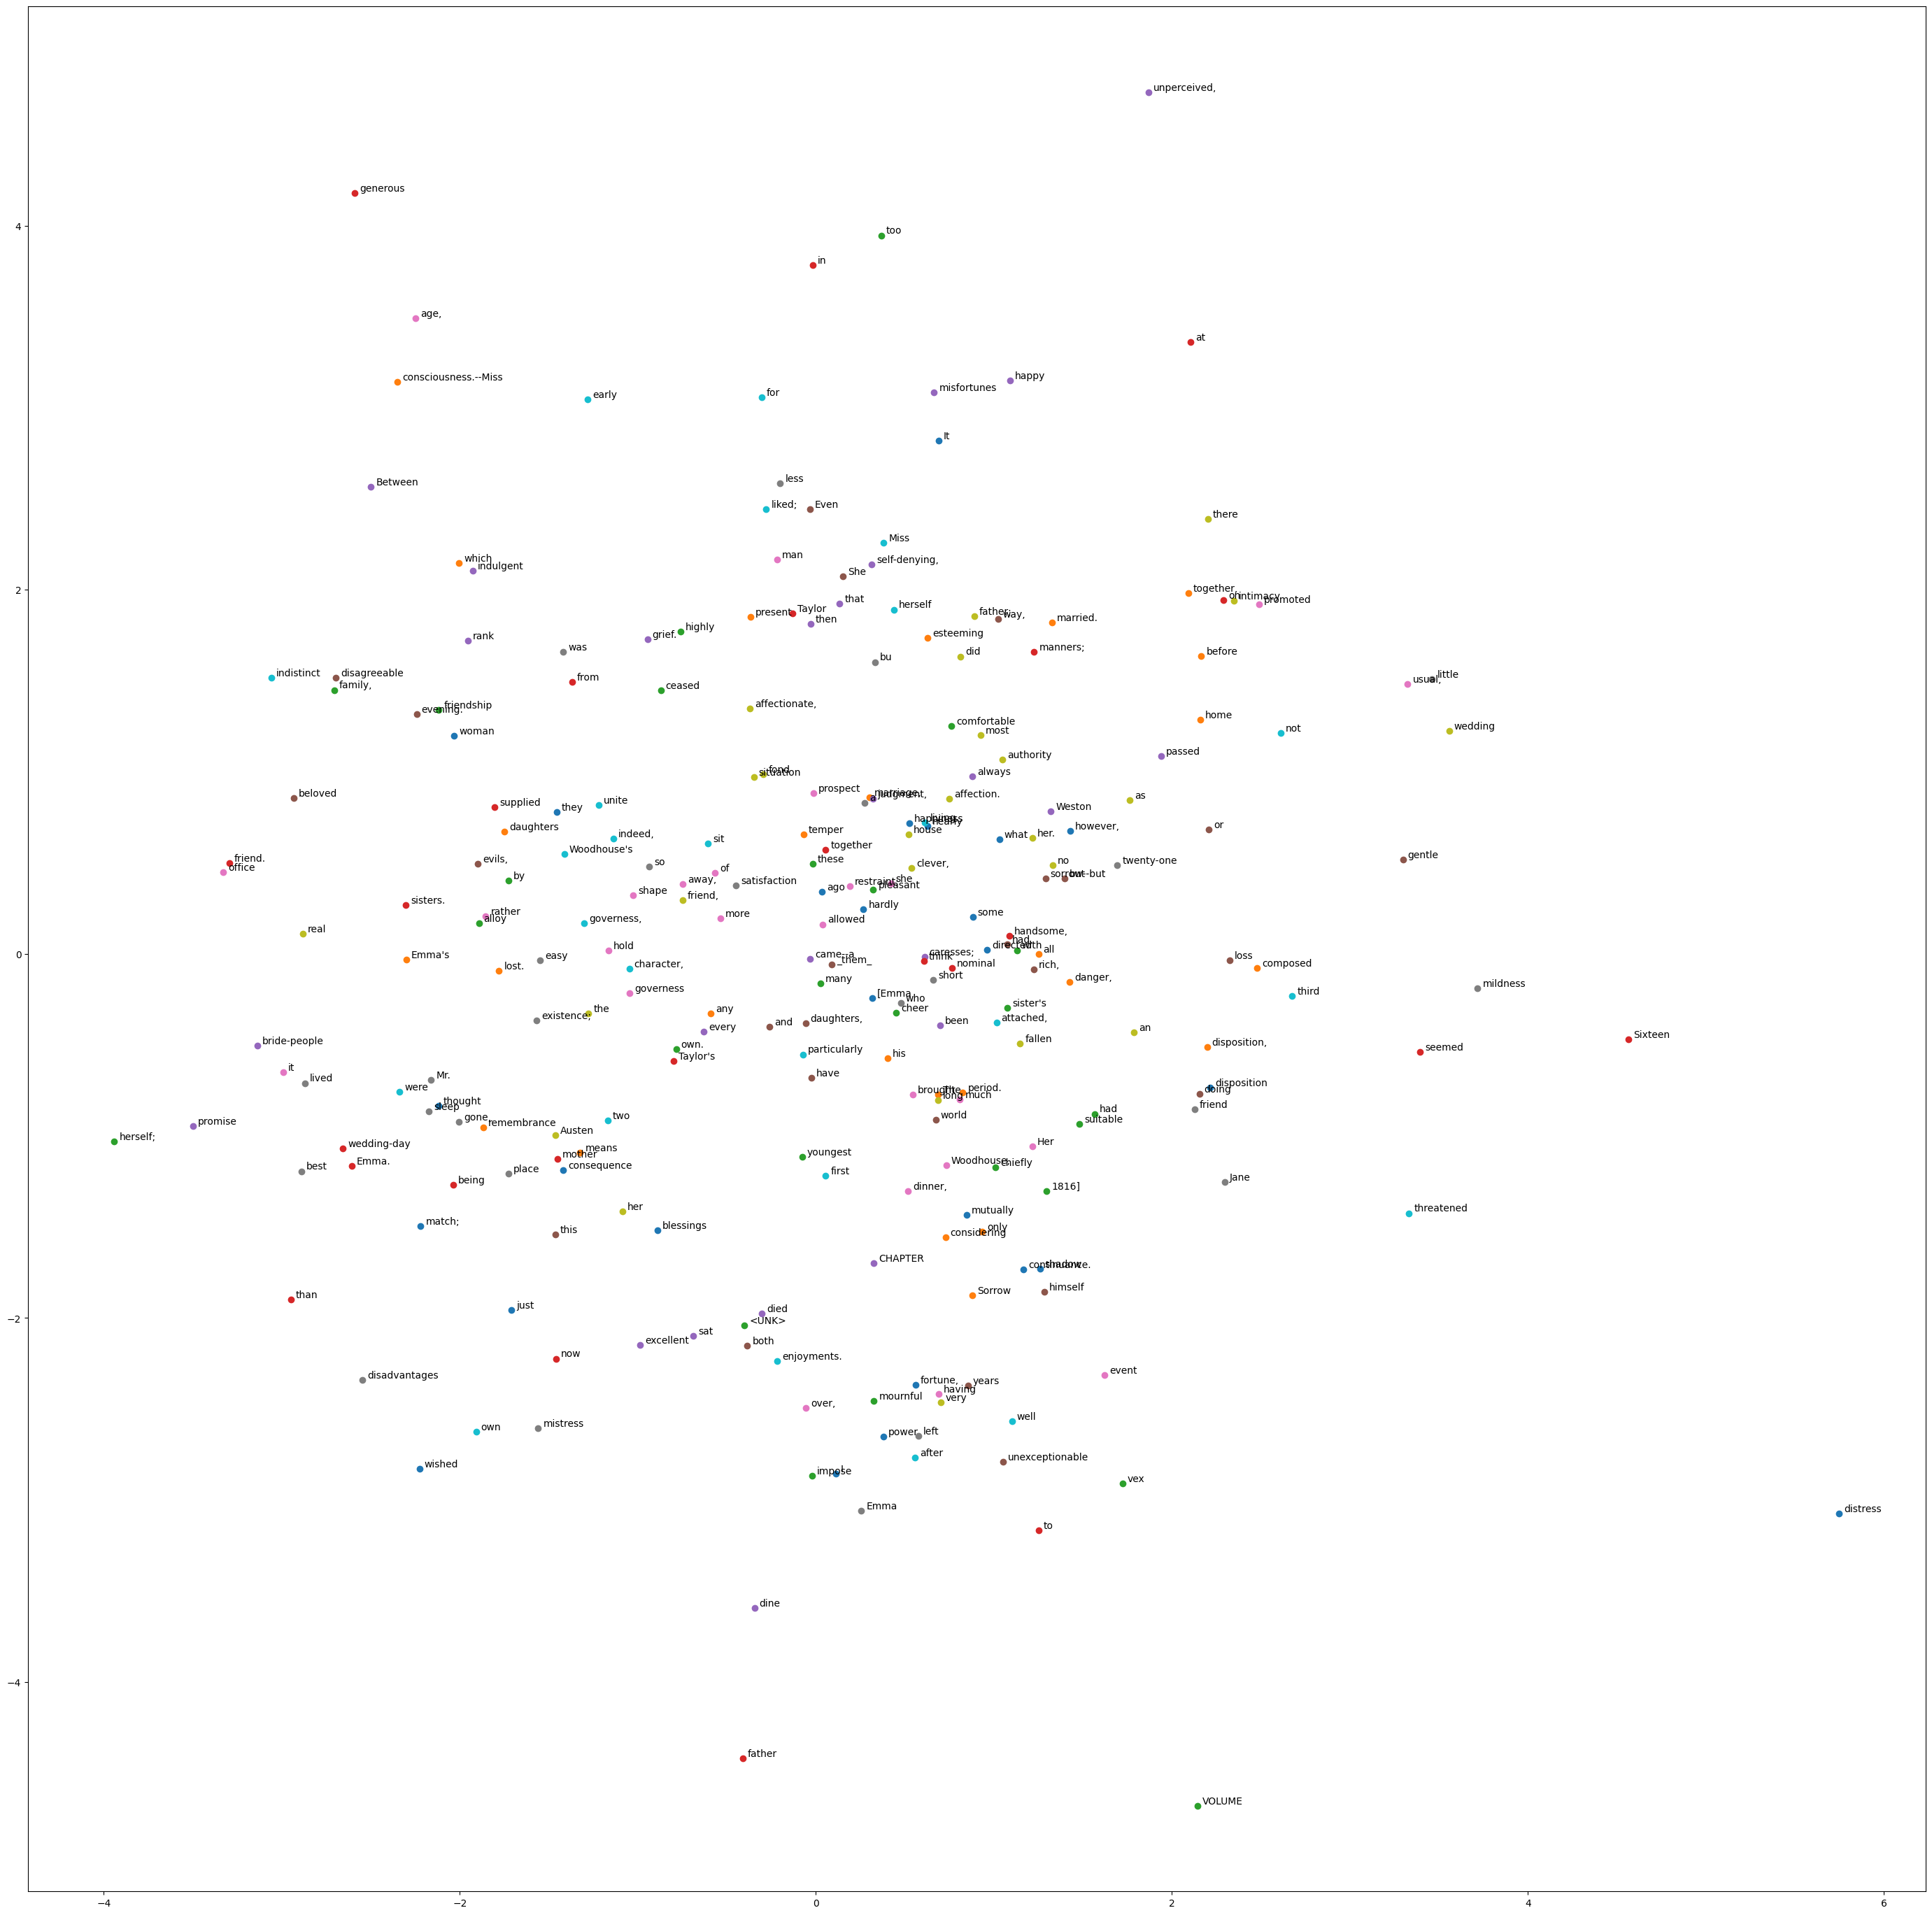

In [86]:
#now we can plot the embeddings
#help me plot the embeddings on matplotlib
plt.figure(figsize=(35,35))
for i, w in enumerate(word2idx):
    x, y = embeddings[i]
    plt.scatter(x, y)
    plt.annotate(w, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()


In [ ]:
# we can see that the embeddings are not very good but that is because we have a small corpus and we have not trained the model for a long time 
# but for the first attempt, i will take it as a success, i will try to improve the model later on 
  


#last of all we need to compare normal version of skipgrams vs. negative sampling version of skipgrams in terms of time (using real corpus we use above)
#we can definitely use the time library to measure the time like start = time.time() and end = time.time() and print(end - start)
#we will  see that the negative sampling version of skipgrams is faster than the normal version of skipgrams
